# ANALYSIS OF VARIANCE (ANOVA)

### What is one-way ANOVA?

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

## Explaination by Implementation

Throughout this notebook, We will follow an example on price across different bookstores for used harry potter book. Imagine that we have purchased books many times for our friends at different stores — A, B, C, D and E — and we have calculated prices.

### 1. Data Generation

In [35]:
import pandas as pd
from numpy import random

In [39]:
L = ['A','B','C','D','E']

random.seed(20)
for i in range(len(L)):
    L[i]=(random.uniform(9,14, size=(7)))
    
print(L)

[array([11.94065401, 13.48856864, 13.45765365, 13.07918739,  9.17944793,
       12.45878791, 10.89340471]), array([11.59255473, 12.28975733,  9.96925109, 10.36158201, 12.59302967,
       12.91501805, 13.2516382 ]), array([12.87622447,  9.18332153,  9.58346868, 12.7564035 , 10.19609108,
       10.27403007, 13.28812766]), array([13.74889513, 11.80843429,  9.8939026 , 12.85125967, 11.4619052 ,
       12.15626533, 13.19748961]), array([11.30519698, 11.48970037, 12.39705559, 12.25392957, 10.34397619,
        9.33662333, 12.85722569])]


In [40]:
all_price = []
store = []
for i in range(len(L)):
    all_price.extend(L[i])
    store.extend(chr(65+i)*len(L[i]))

In [41]:
data = pd.DataFrame({'store': store, 'price': all_price})
data.head()

,store,price
0,A,11.940654
1,A,13.488569
2,A,13.457654
3,A,13.079187
4,A,9.179448


In [42]:
df = data.groupby('store').mean().reset_index()
df

,store,price
0,A,12.071101
1,B,11.853262
2,C,11.165381
3,D,12.159736
4,E,11.426244


The average price per store give a first insight in which store is cheaper — in this case, store C:

### How does ANOVA work?

- The ANOVA model starts by estimating the total amount of variation that exists in the price of book across various stores (this is why it is called Analysis of Variance).

- Looking at our sample, we could say that price ranges from 9.1 to 13.5 dollars. 

- If we ignore the information about the store, the best estimation of price we could give for new book is between 9.1 and 13. 5 dollars. Let’s for now call this total variation.

### 2. Data Visualisation

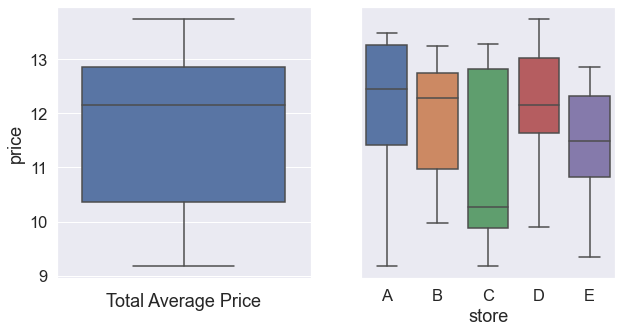

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=data["price"],ax=ax1)
sns.boxplot(x=data['store'],y=data["price"],ax=ax2)
ax2.axes.yaxis.set_ticks([])
ax2.set_ylabel('')
ax1.set_xlabel('Total Average Price')
plt.show()

A_std : 1.573950682900348
B_std : 1.2690640157353807
C_std : 1.7382667178916789
D_std : 1.2796456574698947
E_std : 1.2404128590595018


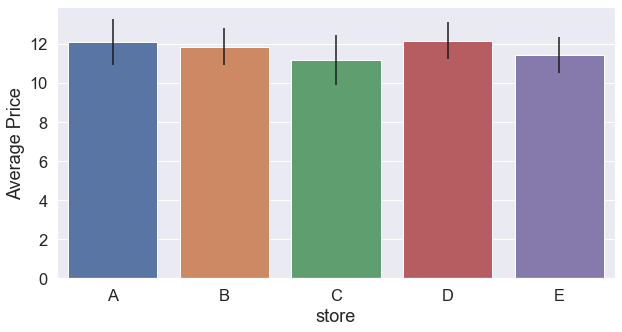

In [45]:
x = ['A','B','C','D','E']
comp_dict = {}

#Assigns each score series to a dictionary key
for comp in x:
    comp_dict[comp] = data[data['store'] == comp]['price']


y = []
yerror = []

#Assigns the mean score and 95% confidence limit to each store
for comp in x:
    y.append(comp_dict[comp].mean())
    yerror.append(1.96*comp_dict[comp].std()/np.sqrt(comp_dict[comp].shape[0]))    
    print(comp + '_std : {}'.format(comp_dict[comp].std()))
       
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(df['store'], df['price'], yerr=yerror)
ax.set_ylabel('Average Price')
plt.show()

From our data exploration, we can see that the average Price are bit different for store C from the rest. We are interested in knowing if this is caused by random variation in data, or if there is an underlying cause.

we are going to use the 1-way ANOVA test anyway just to understand the concepts.

### Between-Group Variation is Explained by our Variable Company

If we add the variable store in the graph, we see that if we know which store we purchase book from, we can give a more precise range of prices.

- If we purchase from store A, it takes between 9.1 and 12.45 dollars.
- If we purchase from store B, it takes between 9.9 and 13.2 dollars.
- If we purchase from store C, it takes between 9.1 and 13.1 dollars.
- If we purchase from store D, it takes between 9.8 and 12.2 dollars.
- If we purchase from store D, it takes between 9.3 and 12.3 dollars.

This phenomenon is due to the Between-Group variation: a quantification of the variation explained by our variable.


### Within-Group Variation is not Explained by our Variable Store

However, there is also some part of variation that cannot be explained by our variable ‘store’: we still don’t know why there is a difference between 9.1 and 13.1 in store C’s price and we would need more variables to explain this.

Since we do not have those new variables, the variation remains unexplained and is called the within-group variation.

### The Null and Alternative Hypothesis

- There are no significant differences between the store's mean Prices.

$$ H_{0}: \mu M_{1}=\mu M_{2}=\mu M_{3}=\mu M_{4}=\mu M_{5}$$

- There is a significant difference between the store's mean Prices.

$$ H_{a}: \mu M_{i}  \neq \mu M_{j} $$

Where $\mu M_{i}$ and $\mu M_{j}$ can be the mean of any store. If there is at least one store with a significant difference with another store, the null hypothesis will be rejected.

### ANOVA: hypothesis test for group differences
When the total variation is split in two, a hypothesis test is applied to find out whether the observed differences in our sample of 35 is significant:

- Is one store giving book at less price, or is this random noise due to the sampling effect?

We need a statistical test to give us this answer: the ANOVA F-test, which is dissected in the rest of this article.

### Formula involved in ANOVA

Similar to the t-test, we can calculate a score for the ANOVA. Then we can look up the score in the F-distribution and obtain a p-value.

- The F-statistic is defined as follows:

$$F = \frac{MS_{b}}{MS_{w}}$$

$$F = \frac{SS_{b}}{K-1}$$

$$SS_{b} = \frac{SS_{w}}{N-K}$$

$$SS_{b} = n_{k}\sum (\bar{x_{k}}-\bar{x_{G}})$$

$$SS_{w} = sum (x_{i}-\bar{x_{G}})^{2}$$

Where $MS_{b}$ is the estimated variance between groups and $MS_{w}$ is the estimated variance within groups, $\bar{x_{k}}$ is the mean within each group, $n_{k}$ is the sample size for each group, $x_{i}$ is the individual data point, and $\bar{x_{G}}$ is the total mean, $SS_{b}$ is sum of squares between the groups and $SS_{w}$ is sum of squares within the groups

This is quite a lot of math, fortunately scipy has a function that plugs in all the values for us.

### 3. 1-Way ANOVA Using StatsModels

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
lm = ols('price ~ store',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq   mean_sq        F    PR(>F)
store      4.0   5.090022  1.272506  0.61859  0.652701
Residual  30.0  61.713195  2.057106      NaN       NaN


#### Pair-wise comparision

In [48]:
pair_t = lm.t_test_pairwise('store')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,-0.217839,0.766645,-0.284146,0.778251,-1.783537,1.347859,0.991020,False
C-A,-0.905720,0.766645,-1.181407,0.246722,-2.471418,0.659979,0.921910,False
D-A,0.088635,0.766645,0.115615,0.908728,-1.477063,1.654334,0.991020,False
E-A,-0.644857,0.766645,-0.841141,0.406924,-2.210555,0.920842,0.966671,False
C-B,-0.687881,0.766645,-0.897261,0.376724,-2.253579,0.877818,0.966671,False
D-B,0.306474,0.766645,0.399760,0.692165,-1.259224,1.872173,0.991020,False
E-B,-0.427018,0.766645,-0.556995,0.581663,-1.992716,1.138681,0.987188,False
D-C,0.994355,0.766645,1.297021,0.204511,-0.571343,2.560053,0.898529,False
E-C,0.260863,0.766645,0.340266,0.736028,-1.304835,1.826561,0.991020,False
E-D,-0.733492,0.766645,-0.956756,0.346338,-2.299190,0.832206,0.966671,False


To understand what happens in this table, We will now show the computation of each of the values in the ANOVA table from scratch!

### 4. 1-Way ANOVA (from scratch)

#### 4.1. Sum of Squares Total
Let’s get to the action! What I described before as variation is mathematically measured by the Sum of Squares,

$$\sum_{i=1}^{n} {(y_{i}-\bar{y})^{2}}$$

In [49]:
# compute overall mean
overall_mean = data['price'].mean()
overall_mean

11.735144623687612

In [50]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['price'] - data['overall_mean'])**2)
ss_total

66.80321731055562

This value can be found in the ANOVA table of statsmodels by taking the sum of the sum_sq column.

#### 4.2. Sum of Squares Residual
The computation for residual Sum of Squares is slightly different because it takes not the overall average, but the three group averages.

We need to subtract each value from the mean of its group (the mean of its own store) and then square those differences and sum them.

Here’s how it’s done in Python:

In [51]:
# compute group means
group_means = data.groupby('store').mean()
group_means = group_means.rename(columns = {'price': 'group_mean'})
group_means

,group_mean,overall_mean
store,,
A,12.071101,11.735145
B,11.853262,11.735145
C,11.165381,11.735145
D,12.159736,11.735145
E,11.426244,11.735145


In [52]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'store', right_index = True)

In [53]:
# compute Sum of Squares Residual
ss_residual = sum((data['price'] - data['group_mean'])**2)
ss_residual

61.71319488221111

We can find this value in the ANOVA table of statsmodels under sum_sq at the line Residual.

#### 4.3. Sum of Squares Explained
Having computed the total sum of squares and the residual sum of squares, we can now compute the Explained Sum of Squares using:

$$SS_{total} = SS_{explained} + SS_{residual}$$

Since we already have the SS-Residual and SS-Total, we could do a simple subtraction to get SS-Explained. To get there the hard way, we take the weighted sum of the squared differences between each group means and the overall mean, as follows:

In [54]:
# compute Sum of Squares Model
ss_explained = sum((data['overall_mean_x'] - data['group_mean'])**2)
ss_explained

5.090022428344523

The value can be found in the statsmodels table under sum_sq at the line company.

#### 4.4. Degrees of freedom
I don’t go into the degrees of freedom in this article, but we need them in further computation:
- df1 = df of the explained part = number of groups — 1
- df2 = df of the residual = number of observations — number of groups

In our example, df1 = 4 and df2 = 30.

#### 4.5. Mean Squares
The statistical test that is central in ANOVA is the F-test. The null hypothesis states that the mean of all groups is equal, which implies that our model has no explanatory value and that we don’t have proof for choosing one store over another to buy the book.

The alternative hypothesis states that at least one of the means is different, which would be a reason to go more in-depth and find out which store or stores are cheaper.

We compute the Mean Squares as follows:

$$MS_{explained} = \frac{SS_{explained}}{df_{explained}}$$
$$MS_{residual} = \frac{SS_{residual}}{df_{residual}}$$

Here’s how it’s done in Python:


In [55]:
# compute Mean Square Residual
n_groups = len(set(data['store']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

2.0571064960737035

### 4.6. F Statistic
We use the Mean Squares to compute the F statistic as the ratio between explained vs unexplained variation:

$$f = \frac{MS_{explained}}{MS_{residual}}$$

Here is the implementation in Python:

In [56]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

1.2725056070861307

In [57]:
# compute F-Value
f = ms_explained / ms_residual
f

0.6185900484563627

#### 4.7. P-value
In hypothesis testing, the p-value is used to decide whether an alternative hypothesis can be accepted or not (read more on p-values here if necessary).

If the p-value is below 0.05, we reject the null hypothesis in favor of the alternative: this means that at least one group mean is __significantly different__.

We compute the P-Value using the F distribution with df1 and df2 degrees of freedom, in our case an F(4, 30) distribution. Using probability calculation, we find the p-value as follows:

In [58]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.6527013700819105

#### 4.8. Interpret p-value

We have to compare the p-value to our chosen alpha, in this case, 0,05.
Our p-value of 0.65 is larger than 0,05, so we cannot reject our null hypothesis and we cannot accept our alternative. Even though the three sample means are different, __we do not have a statistically significant difference.__

This means that with the observed data, there is not enough evidence to assume a general difference in price of book across the given 5 bookstores .

## 5. Conclusion

In this Notebook, ANOVA has allowed us to statistically test whether sample differences can be generalized as population differences.

In our data, one store was cheaper on average, but thanks to ANOVA we realize that this difference is not significant: we don’t have enough proof to conclude that one store is cheaper in general.

This perfectly illustrates the goal of statistical inference: telling whether an observed difference is significant or not.